# 1. What is bilateral filtering? How it works, explain?

- Bilateral filtering is an advanced image processing technique used to remove noise and smooth images, but is not the same as a normal blurring filter. Its specialty is that when we apply bilateral filtering, we smooth the image as much as possible while keeping the sharpness of the image. This removes the noise as much as possible, but keeps the sharpness of the edges intact.

- It mainly deals with two types of weights:
1. Spatial Weight: It works according to the distance of pixels in the image. That is, if a pixel is closer to the central pixel, it has more influence and distant pixels have less influence. It basically works like a Gaussian filter.

2. Intensity Weight: It works according to the value or color difference of the pixels. If the pixels have the same value as the central pixel, they have more influence, but if the difference is more, they have less influence.

- The overall thing is: If I want to smooth the background of a photo, but retain the edges and details of the face, the bilateral filter will come in handy. It is more useful than other blurring methods for removing background noise while retaining the sharp edges of natural images.

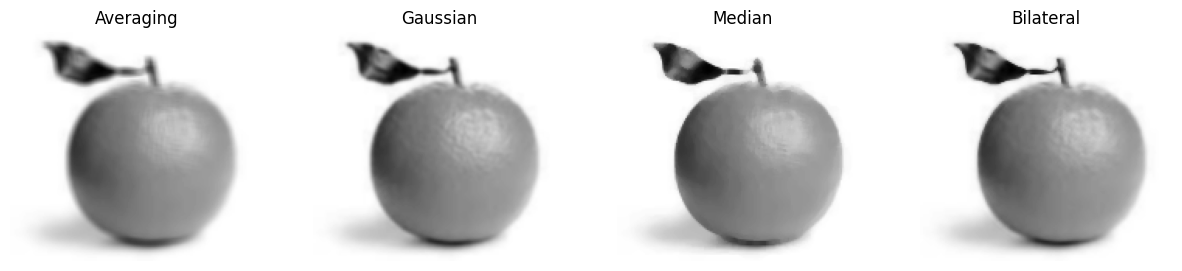

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('orange.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
assert img is not None, "file could not be read, check with os.path.exists()"

avg_blur = cv2.blur(img, (5,5))
gaussian_blur = blur = cv2.GaussianBlur(img,(5,5),0) # std=0 mean openCV will automatically
median_blur = cv2.medianBlur(img, 5)
bilateral_blur = cv2.bilateralFilter(img, 5, 75, 75)


plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.imshow(avg_blur, cmap='gray')
plt.title('Averaging')
plt.axis('off')

plt.subplot(142)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian')
plt.axis('off')

plt.subplot(143)
plt.imshow(median_blur, cmap='gray')
plt.title('Median')
plt.axis('off')

plt.subplot(144)
plt.imshow(bilateral_blur, cmap='gray')
plt.title('Bilateral')
plt.axis('off')

plt.show()

# 2. Explain the sigmaColor and sigmaSpace parameter of bilateralFilter() function of OpenCV.

##### Bilateral Filter Function in OpenCV 
- The bilateralFilter() function in OpenCV is used for edge-preserving smoothing. when we apply bilateral filtering, we smooth the image as much as possible while keeping the sharpness of the image.

1. sigmaColor:
Controls filtering based on color similarity. A larger value of the parameter means that farther colors within the pixel neighborhood will be mixed together, resulting in larger areas of semi-equal color.


2. sigmaSpace:
Controls filtering based on spatial distance. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough. When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.

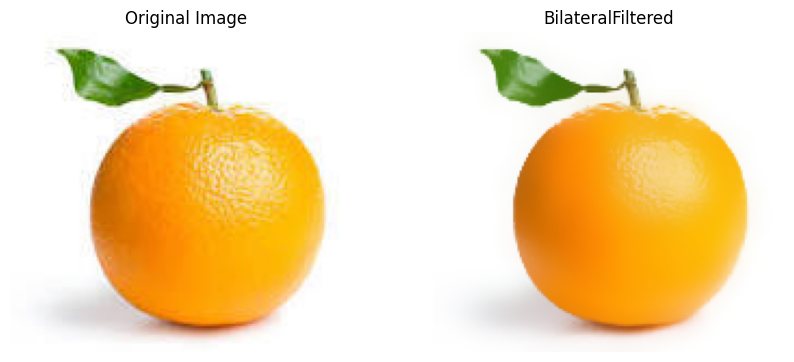

In [2]:
import cv2
import matplotlib.pyplot as plt 

image = cv2.imread('orange.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Bilateral Filter
filtered_image = cv2.bilateralFilter(image, d=15, sigmaColor=75, sigmaSpace=75)

# Convert filtered image to RGB 
filtered_image_rgb = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_rgb)
plt.title('BilateralFiltered')
plt.axis('off')

plt.show()